In [22]:
#import essentials
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

rawdata = pd.read_csv('trainpreprocessed.csv')
deploy = pd.read_csv('test.csv')

In [23]:
from sklearn.model_selection import train_test_split

x = rawdata.drop('SalePrice',axis = 1)
y = rawdata.SalePrice

#xtrain, xsplit, ytrain, ysplit = train_test_split(x,y,test_size = 0.2, random_state = 42)
#xtest,xval,ytest,yval = train_test_split(xsplit,ysplit,test_size = 0.5, random_state = 42)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.15, random_state = 42)
#xtest,xval,ytest,yval = train_test_split(xsplit,ysplit,test_size = 0.5, random_state = 42)

xtrain.reset_index(drop=True,inplace = True)
ytrain.reset_index(drop=True,inplace = True)

xtest.reset_index(drop=True,inplace = True)
ytest.reset_index(drop=True,inplace = True)

xval.reset_index(drop=True, inplace = True)
yval.reset_index(drop=True, inplace = True)

<Axes: xlabel='SalePrice', ylabel='Count'>

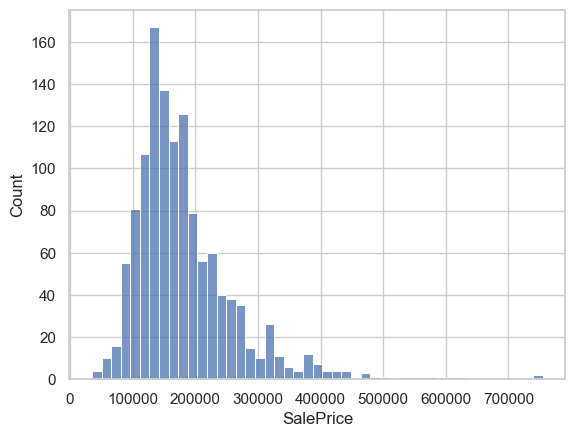

In [24]:
sns.histplot(ytrain)

<Axes: xlabel='SalePrice', ylabel='Count'>

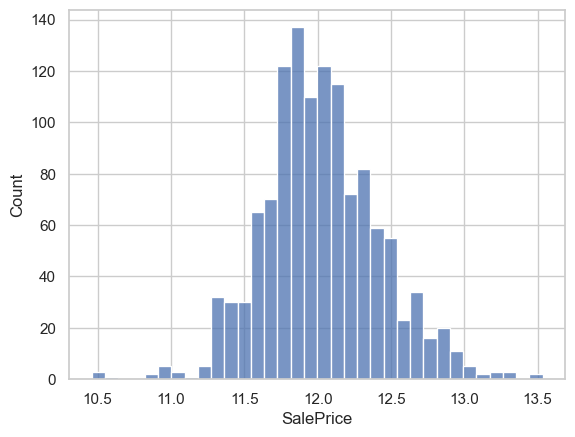

In [25]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

#since we're using a tree algorithm, we don't need to scale the numeric variable
#tryout log transformation
ytrain_ori = ytrain.copy()

ytrain = np.log1p(ytrain)
sns.histplot(ytrain)


D:\Sean\Miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Sean\Miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE of prediction on train data:85.02182403293686
RMSE of prediction on test data:25774.89113113113


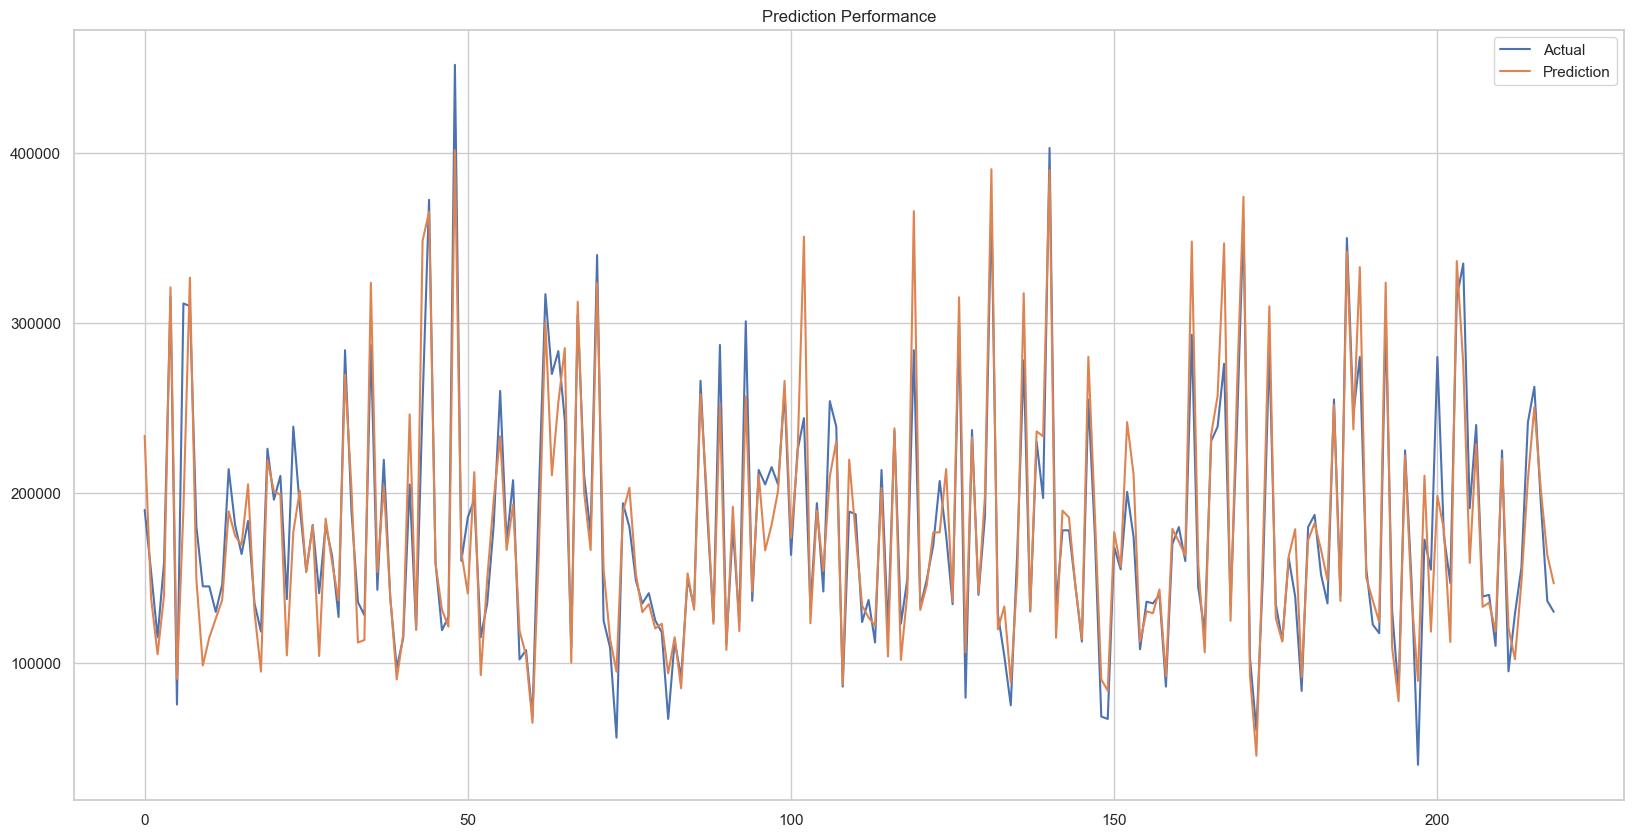

In [26]:
xgb = XGBRegressor(booster='gbtree',random_state = 42,
                   eval_metric = 'rmse',
                   max_depth=28,
                   objective='reg:squarederror',
                   n_estimators = 1000)
xgb.fit(xtrain,ytrain)
xgbpredtrain = np.expm1(xgb.predict(xtrain))
xgbfinalpredtrain = np.where(xgbpredtrain<0,0,xgbpredtrain)

xgbpredtest = np.expm1(xgb.predict(xtest))
xgbfinalpredtest = np.where(xgbpredtest<0,0,xgbpredtest)

print('RMSE of prediction on train data:'+str(mean_squared_error(ytrain_ori,xgbfinalpredtrain,squared = False)))
print('RMSE of prediction on test data:'+str(mean_squared_error(ytest,xgbfinalpredtest,squared = False)))

plt.figure(figsize=(20, 10))
plt.plot(ytest.reset_index(drop=True),label ='Actual')
plt.plot(pd.Series(xgbfinalpredtest).reset_index(drop=True),label = 'Prediction')
plt.legend()
plt.title('Prediction Performance')
plt.show()

Learning rate set to 0.042358
0:	learn: 0.3876366	total: 5.8ms	remaining: 5.8s
1:	learn: 0.3777152	total: 10.2ms	remaining: 5.09s
2:	learn: 0.3680150	total: 14.6ms	remaining: 4.85s
3:	learn: 0.3582049	total: 19.4ms	remaining: 4.84s
4:	learn: 0.3482909	total: 23.5ms	remaining: 4.68s
5:	learn: 0.3391268	total: 28.2ms	remaining: 4.67s
6:	learn: 0.3302749	total: 32.1ms	remaining: 4.56s
7:	learn: 0.3220975	total: 36.2ms	remaining: 4.49s
8:	learn: 0.3134757	total: 40.2ms	remaining: 4.42s
9:	learn: 0.3062368	total: 44.2ms	remaining: 4.38s
10:	learn: 0.2979680	total: 48.5ms	remaining: 4.36s
11:	learn: 0.2904762	total: 52.4ms	remaining: 4.31s
12:	learn: 0.2840982	total: 57.1ms	remaining: 4.33s
13:	learn: 0.2774966	total: 61.1ms	remaining: 4.31s
14:	learn: 0.2715034	total: 65.4ms	remaining: 4.29s
15:	learn: 0.2658686	total: 69.6ms	remaining: 4.28s
16:	learn: 0.2606197	total: 74.2ms	remaining: 4.29s
17:	learn: 0.2549864	total: 78ms	remaining: 4.26s
18:	learn: 0.2493149	total: 82ms	remaining: 4.23

D:\Sean\Miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\Sean\Miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE of prediction on train data:5490.793614876211
RMSE of prediction on test data:20312.236479437404


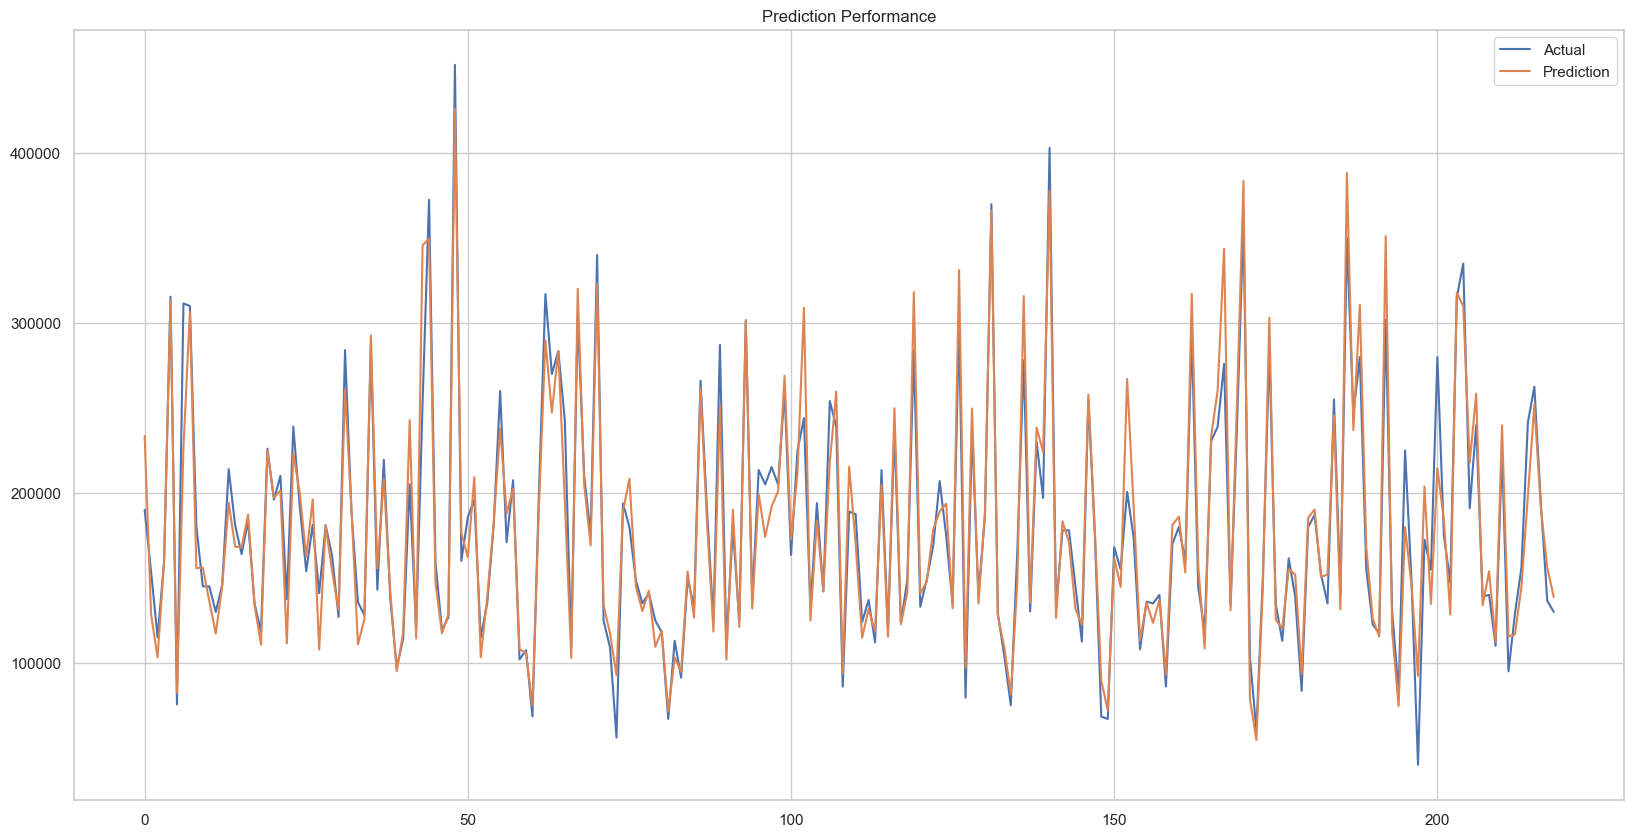

In [27]:
cb = CatBoostRegressor(random_state = 42)

cb.fit(xtrain,ytrain)

cbpredtrain = np.expm1(cb.predict(xtrain))
cbfinalpredtrain = np.where(cbpredtrain<0,0,cbpredtrain)

cbpredtest = np.expm1(cb.predict(xtest))
cbfinalpredtest = np.where(cbpredtest<0,0,cbpredtest)

print('RMSE of prediction on train data:'+str(mean_squared_error(ytrain_ori,cbfinalpredtrain,squared = False)))
print('RMSE of prediction on test data:'+str(mean_squared_error(ytest,cbfinalpredtest,squared = False)))

plt.figure(figsize=(20, 10))
plt.plot(ytest.reset_index(drop=True),label ='Actual')
plt.plot(pd.Series(cbfinalpredtest).reset_index(drop=True),label = 'Prediction')
plt.legend()
plt.title('Prediction Performance')
plt.show()

############# Baseline #############

In [28]:
ybaseline = [ytest.mean()] * len(ytest)
rmsebaseline = mean_squared_error(ytest,ybaseline,squared = False)
print('RMSE Baseline: {}'.format(rmsebaseline))

RMSE Baseline: 71385.01367572624


D:\Sean\Miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


############# Baseline #############

to really understand which model to use, we should compare the sum of loss profit that we received from both models because sometimes it's more important to look at loss profit than to look at loss opportunity.

In [ ]:
#evaluating loss profit
totaltabxgb = np.where(ytest>xgbfinalpredtest, ytest-xgbfinalpredtest, 0)
totaltabcb = np.where(ytest>cbfinalpredtest,ytest-cbfinalpredtest,0)

lossprofxgb = np.sum(totaltabxgb)
lossprofcb = np.sum(totaltabcb)

print('Loss Profit Valuation (XGBoost):'+str(lossprofxgb))
print('Loss Profit Valuation (CatBoost):'+str(lossprofcb))

In [ ]:
#comparing for validation data
valxgb = np.where(xgb.predict(xval)<0,0,xgb.predict(xval))
valcb = np.where(cb.predict(xval)<0,0,cb.predict(xval))

print('RMSE of prediction on validation data (XGBoost):'+str(mean_squared_error(yval,valxgb,squared = False)))
print('RMSE of prediction on validation data (CatBoost):'+str(mean_squared_error(yval,valcb,squared = False)))

In [ ]:
#evaluating loss profit
totaltabxgb = np.where(yval>valxgb, ytest-valxgb, 0)
totaltabcb = np.where(yval>valcb,ytest-valcb,0)

lossprofxgb = np.sum(totaltabxgb)
lossprofcb = np.sum(totaltabcb)

print('Loss Profit Valuation (XGBoost):'+str(lossprofxgb))
print('Loss Profit Valuation (CatBoost):'+str(lossprofcb))